In [34]:
import pandas as pd
import numpy as np
#total_noanswer.csv
data = pd.read_csv('./archive/02-14-2018.csv')
data = data.append(pd.read_csv('./archive/02-15-2018.csv'))
data = data.append(pd.read_csv('./archive/total_noanswer.csv'))

In [35]:
from unidecode import unidecode
data.drop(['Timestamp'],axis=1,inplace=True)
data["Label"] = data["Label"].apply(unidecode)
# data.drop(['Label'],axis=1,inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109651 entries, 0 to 12500
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Flow Duration      int64  
 3   Tot Fwd Pkts       int64  
 4   Tot Bwd Pkts       int64  
 5   TotLen Fwd Pkts    int64  
 6   TotLen Bwd Pkts    int64  
 7   Fwd Pkt Len Max    int64  
 8   Fwd Pkt Len Min    int64  
 9   Fwd Pkt Len Mean   float64
 10  Fwd Pkt Len Std    float64
 11  Bwd Pkt Len Max    int64  
 12  Bwd Pkt Len Min    int64  
 13  Bwd Pkt Len Mean   float64
 14  Bwd Pkt Len Std    float64
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float64
 17  Flow IAT Mean      float64
 18  Flow IAT Std       float64
 19  Flow IAT Max       int64  
 20  Flow IAT Min       int64  
 21  Fwd IAT Tot        int64  
 22  Fwd IAT Mean       float64
 23  Fwd IAT Std        float64
 24  Fwd IAT Max        int64  
 25  Fwd IAT Min        i

In [40]:
data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641719,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,112641466,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,112638623,3,0,0,0,0,0,0.000000,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,6453966,15,10,1239,2273,744,0,82.600000,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,8804066,14,11,1143,2209,744,0,81.642857,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [41]:
data["Label"].value_counts()

Benign                   1676204
FTP-BruteForce            193360
SSH-Bruteforce            187589
DoS attacks-GoldenEye      41508
DoS attacks-Slowloris      10990
Name: Label, dtype: int64

In [42]:
np.unique(data['Label'])


array(['Benign', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder



#drop na values and reset index
data_clean = data.dropna().reset_index()
data_clean

,index,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,0,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,1.393000e+02,56320958,56320761,Benign
1,1,0,0,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,1.145513e+02,56320814,56320652,Benign
2,2,0,0,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,3.019346e+02,56319525,56319098,Benign
3,3,22,6,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
4,4,22,6,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102448,12496,80,6,30027649,4,0,246,0,66,60,...,20,0.0,0.0,0,0,15000934.5,1.499058e+07,29991510,10359,Benign
2102449,12497,80,6,2119685,4,0,246,0,66,60,...,20,0.0,0.0,0,0,1059837.5,1.047814e+06,2107651,12024,Benign
2102450,12498,80,6,30021918,4,0,246,0,66,60,...,20,0.0,0.0,0,0,15000262.0,1.499040e+07,29990661,9863,Benign
2102451,12499,80,6,30023465,4,0,246,0,66,60,...,20,0.0,0.0,0,0,15001124.0,1.499180e+07,29992920,9328,Benign


In [44]:
# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_np = data_clean.to_numpy(dtype="float32")

data_np

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.6320960e+07,
        5.6320760e+07, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.6320816e+07,
        5.6320652e+07, 0.0000000e+00],
       [2.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.6319524e+07,
        5.6319096e+07, 0.0000000e+00],
       ...,
       [1.2498000e+04, 8.0000000e+01, 6.0000000e+00, ..., 2.9990660e+07,
        9.8630000e+03, 0.0000000e+00],
       [1.2499000e+04, 8.0000000e+01, 6.0000000e+00, ..., 2.9992920e+07,
        9.3280000e+03, 0.0000000e+00],
       [1.2500000e+04, 8.0000000e+01, 6.0000000e+00, ..., 2.9989760e+07,
        9.7890000e+03, 0.0000000e+00]], dtype=float32)

In [45]:
data_np = data_np[~np.isinf(data_np).any(axis=1)]

X = data_np[:, 0:78]

print(X)

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,79:]).toarray()

print("****")
print(Y)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.6320860e+07
  1.3930003e+02 5.6320960e+07]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.6320732e+07
  1.1455130e+02 5.6320816e+07]
 [2.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.6319312e+07
  3.0193460e+02 5.6319524e+07]
 ...
 [1.2498000e+04 8.0000000e+01 6.0000000e+00 ... 1.5000262e+07
  1.4990399e+07 2.9990660e+07]
 [1.2499000e+04 8.0000000e+01 6.0000000e+00 ... 1.5001124e+07
  1.4991796e+07 2.9992920e+07]
 [1.2500000e+04 8.0000000e+01 6.0000000e+00 ... 1.4999774e+07
  1.4989986e+07 2.9989760e+07]]
****
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [46]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

print(_features)

78


In [47]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import uuid
import gc
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars

In [48]:
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(78, 1)))
model.add(Activation('relu'))
model.add(Convolution1D(filters=256, kernel_size=6))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15))
model.add(Activation('softmax'))
model.summary() 

tf.keras.utils.plot_model(
    model,
        show_shapes=True,
    show_dtype=False,
      show_layer_names=False,
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 73, 128)           896       
_________________________________________________________________
activation_1 (Activation)    (None, 73, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 68, 256)           196864    
_________________________________________________________________
activation_2 (Activation)    (None, 68, 256)           0         
_________________________________________________________________
flatten (Flatten)            (None, 17408)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               4456704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [49]:
K = keras.backend

nn_history = {}

def train_dynamic_model(args):
    print('\nRun') 
    print('==========')
    print('Parameters:\n{}'.format(args))
    
    batch_size = int(args['batch_size'])
    dropout_rate = args['dropout_rate']
    model_name = '3NN-models/{}.h5'.format(uuid.uuid4()) 
    opt_name = args['optimizer']['name']

        
    K.clear_session()
    gc.collect()

 

    # Simple 3 Layer Dense Model
    model = Sequential()
    model.add(Dense(128, input_dim=_features, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(n_classes))
    model.add(Activation('softmax'))
    model.summary() 

    model.compile(loss='categorical_crossentropy',optimizer=opt_name ,metrics=['accuracy'])

    early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.001)
    
    hist = model.fit(X_train, Y_train,
                              batch_size=batch_size,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test),
                              callbacks=[reduce_lr, early_stop_callback])
    
    nn_history[model_name] = hist.history
    
    y_pred = model.predict_classes(X_test)
    balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
    best_loss = np.amin(hist.history['val_loss']) 
    print('Best loss: {}'.format(best_loss))
    print('Model: {}'.format(model_name))
    print('Balanced Acc loss: {}'.format(balanced_score))
    
    return {
        'loss': best_loss,
        'status': STATUS_OK,
        'model_name': model_name
    }

In [50]:
args = {
    'batch_size': 500,
    'dropout_rate': 0.1,
    'optimizer':
        {
            'name': 'adam',
        }
}
train_dynamic_model(args)


Run
Parameters:
{'batch_size': 500, 'dropout_rate': 0.1, 'optimizer': {'name': 'adam'}}
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               10112     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
_________________________________________________________________
activation (Activation)      (None, 5)                 0         
Total params: 43,781
Trainable pa

D:\Users\hyo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Best loss: 0.00038236583350226283
Model: 3NN-models/8425bf0f-2702-4242-ab9d-7c485746f0cf.h5
Balanced Acc loss: 99.990198628675


{'loss': 0.00038236583350226283,
 'status': 'ok',
 'model_name': '3NN-models/8425bf0f-2702-4242-ab9d-7c485746f0cf.h5'}

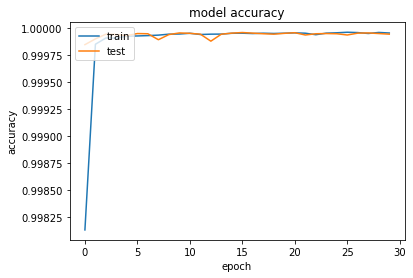

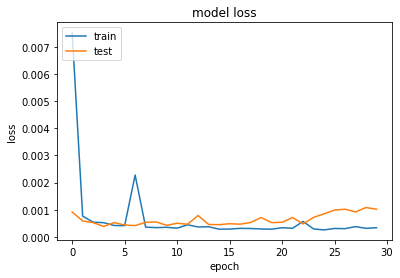

In [51]:
import matplotlib.pyplot as plt

plt.plot(nn_history["3NN-models/8425bf0f-2702-4242-ab9d-7c485746f0cf.h5"]['accuracy'])
plt.plot(nn_history["3NN-models/8425bf0f-2702-4242-ab9d-7c485746f0cf.h5"]['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nn_history["3NN-models/8425bf0f-2702-4242-ab9d-7c485746f0cf.h5"]['loss'])
plt.plot(nn_history["3NN-models/8425bf0f-2702-4242-ab9d-7c485746f0cf.h5"]['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<AxesSubplot:>

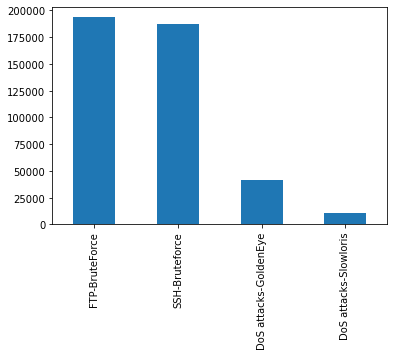

In [52]:
data[data["Label"] != "Benign"]["Label"].value_counts().plot(kind='bar')